When a model:

1) Fits training data too well
2) Learns noise instead of patterns
3) It performs badly on new (test) data.

Regularization fixes this by:
> Adding a penalty to large weights (coefficients).

| Method      | Shrinks Weights | Makes Some Zero? | Good For            |
| ----------- | --------------- | ---------------- | ------------------- |
| Ridge       |  Yes           |  No             | Multicollinearity   |
| Lasso       |  Yes           | Yes            | Feature selection   |
| Elastic Net |  Yes           |  Yes            | Correlated features |


# what is overfitting ? 

Overfitting happens when a model learns the training data too well — including noise and random patterns — and fails on new data.
>Model memorizes instead of learning.

_________

> let's call the Training line as Ln
and testing line as Lr

in example : 
-  Ln : y = 1.5x + 0.8 
-  Lr : y = 0.9x + 1.5

## Ridge Regularization

In **Linear Regression**, we choose the best-fit line by minimizing the error, usually the **Mean Squared Error (MSE)**:

\[
Loss = MSE
\]

In **Ridge Regularization**, we modify the error formula by adding an extra penalty term:

$$
Loss = MSE + \lambda \sum w^2
$$

This extra term is called the **L2 penalty**.


### Ridge Penalty Term

- **Simple Linear Regression** → penalty:

$$
\lambda m^2
$$

- **Multiple Linear Regression** → penalty:

$$
\lambda \sum_{i=1}^{n} w_i^2
$$


#### we are going to find the value the penalty term for both lines Ln and Lr

> here we have two losses: so model will choose the model with less loss 

## code

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_diabetes

data=load_diabetes()

In [7]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [8]:
X = data.data
y = data.target

In [9]:
X.shape

(442, 10)

In [10]:
y.shape

(442,)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [12]:
from sklearn.linear_model import LinearRegression
L=LinearRegression()

In [13]:
L.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
print(L.coef_)
print(L.intercept_)

[  23.45465406 -247.42747406  492.1087518   329.35876431 -970.79723039
  573.54295519  182.42162368  255.92168168  794.21609282   89.32249214]
152.13623331746496


In [15]:
y_pred=L.predict(X_test)

In [16]:
from sklearn.metrics import r2_score,mean_squared_error

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.5188113124539249
RMSE 48.72713760953253


In [30]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=10000)

In [31]:
R.fit(X_train,y_train)

,alpha,10000
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [32]:

print(R.coef_)
print(R.intercept_)

[ 0.02600397  0.00569999  0.07764433  0.06096237  0.02337539  0.0184614
 -0.05138155  0.05270009  0.07344326  0.05284829]
151.83304231078424


In [33]:
y_pred1=R.predict(X_test)

In [34]:
print("R2 score",r2_score(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score -0.00018352535703880513
RMSE 70.2510863104429


## Model Comparison: Linear Regression vs Ridge Regression

### Linear Regression

- **R² Score:** 0.5188  
- **RMSE:** 48.73  

**Interpretation:**
- The model explains about **51.88%** of the variance in the target variable.
- RMSE of 48.73 indicates the average prediction error magnitude.
- Overall, the model performs reasonably well.

---

### Ridge Regression

- **R² Score:** -0.0004  
- **RMSE:** 70.26  

**Interpretation:**
- Negative R² means the model performs **worse than predicting the mean**.
- Higher RMSE (70.26) indicates larger prediction errors.
- This suggests that Ridge regularization may have been too strong (λ too large), causing underfitting.

---

## Conclusion

- Linear Regression performed significantly better in this case.
- Ridge Regression likely used a high regularization parameter (λ), which shrunk coefficients too much.
- Proper tuning of λ (using cross-validation) is necessary for optimal Ridge performance.


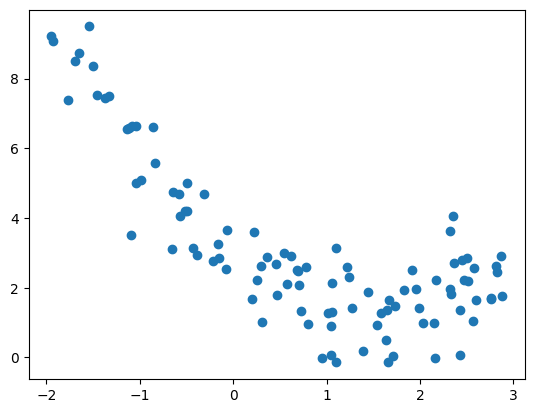

In [35]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

#non linear dataset

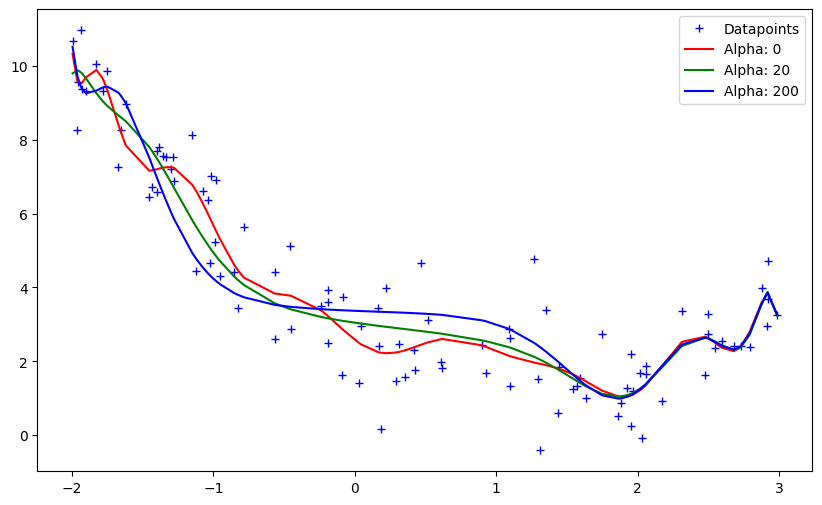

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()